[View in Colaboratory](https://colab.research.google.com/github/madeleinelee/learning/blob/madeleinelee-patch-1/ex04_optimizerSelection.ipynb)

## 確認套件已經安裝 & Get data

In [0]:
from __future__ import print_function
!pip install -q keras
import keras
from google.colab import files
import numpy as np
from past.builtins import execfile
import numpy as np
import os

from keras.utils import np_utils
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

Using TensorFlow backend.


## 請將本機端的資料 "pkgo_city66_cass5_v1.csv" 上傳到 colab 環境

In [0]:
if not os.path.exists("pkgo_city66_class5_v1.csv"):
  uploaded = files.upload()

def readInput(file):
  ''' Read input files '''
  my_data = np.genfromtxt(file, delimiter=',',skip_header=1)

  ''' The first column to the 199th column is used as input features '''
  X_train = my_data[:,0:200]
  X_train = X_train.astype('float32')

  ''' The 200-th column is the answer '''
  y_train = my_data[:,200]
  y_train = y_train.astype('int')

  ''' Convert to one-hot encoding '''
  Y_train = np_utils.to_categorical(y_train,5)

  ''' Shuffle training data '''
  X_train,Y_train = shuffle(X_train,Y_train,random_state=100)
  return X_train, Y_train

X_train, Y_train = readInput(file="pkgo_city66_class5_v1.csv")

## 開始建立第一個模型 
### (資料已經先替各位做過簡單的預處理囉)

In [0]:
''' Import keras to build a DL model '''
from keras.models import Model
from keras.layers import Dense, Activation, Input
from keras.optimizers import SGD, Adam, RMSprop, Adagrad
import keras.backend as K

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 200)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               25728     
_________________________________________________________________
activation_1 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33024     
_________________________________________________________________
activation_2 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 1285      
_________________________________________________________________
activation_3 (Activation)    (None, 5)                 0         
Total para

1652/1652 [==============================] - 0s 178us/step - loss: 0.8973 - acc: 0.6774 - val_loss: 0.9173 - val_acc: 0.6522
Epoch 9/30
1652/1652 [==============================] - 0s 160us/step - loss: 0.8619 - acc: 0.7004 - val_loss: 0.9076 - val_acc: 0.6739
Epoch 10/30
1652/1652 [==============================] - 0s 163us/step - loss: 0.8277 - acc: 0.6967 - val_loss: 0.8292 - val_acc: 0.7228
Epoch 11/30
1652/1652 [==============================] - 0s 176us/step - loss: 0.8233 - acc: 0.7070 - val_loss: 0.7981 - val_acc: 0.7011
Epoch 12/30
1652/1652 [==============================] - 0s 175us/step - loss: 0.7726 - acc: 0.7222 - val_loss: 0.8063 - val_acc: 0.7120
Epoch 13/30
1652/1652 [==============================] - 0s 175us/step - loss: 0.7561 - acc: 0.7300 - val_loss: 0.8213 - val_acc: 0.7174
Epoch 14/30
1652/1652 [==============================] - 0s 172us/step - loss: 0.7404 - acc: 0.7421 - val_loss: 0.7523 - val_acc: 0.7609
Epoch 15/30
1652/1652 [==============================]

Epoch 23/30
1652/1652 [==============================] - 0s 164us/step - loss: 0.5965 - acc: 0.7863 - val_loss: 0.8141 - val_acc: 0.7391
Epoch 24/30
1652/1652 [==============================] - 0s 156us/step - loss: 0.5875 - acc: 0.7821 - val_loss: 0.8292 - val_acc: 0.7120
Epoch 25/30
1652/1652 [==============================] - 0s 154us/step - loss: 0.5534 - acc: 0.8093 - val_loss: 0.9119 - val_acc: 0.6630
Epoch 26/30
1652/1652 [==============================] - 0s 153us/step - loss: 0.5167 - acc: 0.8142 - val_loss: 0.8765 - val_acc: 0.7174
Epoch 27/30
1652/1652 [==============================] - 0s 164us/step - loss: 0.5205 - acc: 0.8166 - val_loss: 0.8723 - val_acc: 0.7337
Epoch 28/30
1652/1652 [==============================] - 0s 153us/step - loss: 0.5099 - acc: 0.8148 - val_loss: 0.8535 - val_acc: 0.7174
Epoch 29/30
1652/1652 [==============================] - 0s 161us/step - loss: 0.4793 - acc: 0.8432 - val_loss: 0.8174 - val_acc: 0.7120
Epoch 30/30
1652/1652 [==================

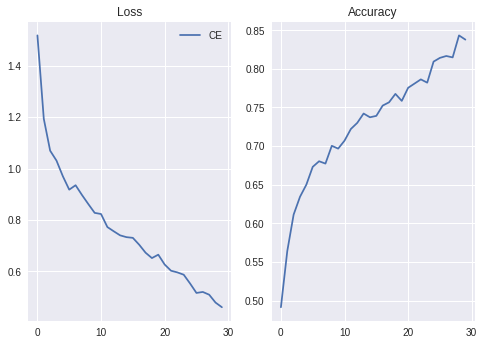

In [0]:
#@title Optimizer selection { vertical-output: true, display-mode: "both" }
optim = "sgd" #@param ["sgd", "Adam"]
K.clear_session()

x_input = Input(shape = [X_train.shape[1]])

x = Dense(128)(x_input)
x = Activation('relu')(x)

x = Dense(256)(x)
x = Activation('relu')(x)

x = Dense(5)(x)
out = Activation('softmax')(x)

model = Model(inputs=[x_input], outputs=[out])

if optim == "sgd":
  optim = SGD(lr= 0.01, momentum=0.0,decay=0.0,nesterov=False)
elif optim == "Adam":
  optim = Adam(lr = 0.001)

model.compile(loss='categorical_crossentropy',
				optimizer=optim,
				metrics=['accuracy'])
model.summary()

batch_size = 16
epochs = 30

history = model.fit(X_train, Y_train,
							batch_size=batch_size,
							epochs=epochs,
							verbose=1,
							shuffle=True,
              validation_split=0.1)

loss	= history.history.get('loss')
acc 	= history.history.get('acc')

''' Visualize the loss and accuracy of both models'''
plt.figure(0)
plt.subplot(121)
plt.plot(range(len(loss)), loss,label='CE')
plt.title('Loss')
plt.legend(loc='upper right')
plt.subplot(122)
plt.plot(range(len(acc)), acc,label='CE')
plt.title('Accuracy')
plt.show()

## 同時比較多種 optimizers 對訓練結果之差異

Running model, optimizers = sgd
Running model, optimizers = Adam


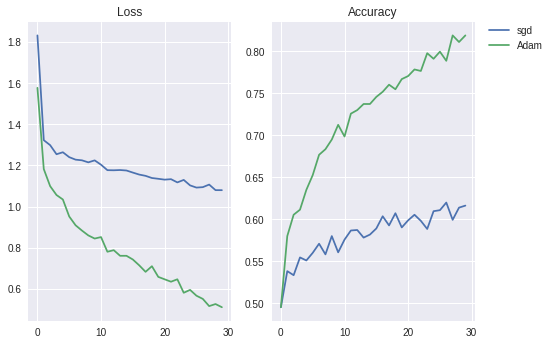

In [0]:
#@title Optimizers Comparison { vertical-output: true, display-mode: "both" }
optim_list = ["sgd", "Adam"] #@param {type:"raw"}
all_loss, all_acc = [], []

import keras.backend as K
batch_size = 16
epochs = 30

for optim in optim_list:
  K.clear_session()
  print("Running model, optimizers = %s" % optim)
  
  x_input = Input(shape = [X_train.shape[1]])

  x = Dense(128)(x_input)
  x = Activation('relu')(x)

  x = Dense(256)(x)
  x = Activation('relu')(x)

  x = Dense(5)(x)
  out = Activation('softmax')(x)

  model = Model(inputs=[x_input], outputs=[out])

  if optim == "sgd":
    optim = SGD(lr= 0.01, momentum=0.0,decay=0.0,nesterov=False)
  elif optim == "Adam":
    optim = Adam(lr = 0.001)

  model.compile(loss='categorical_crossentropy',
          optimizer=optim,
          metrics=['accuracy'])


  history = model.fit(X_train, Y_train,
                batch_size=batch_size,
                epochs=epochs,
                verbose=0,
                shuffle=True,
                validation_split=0.1)

  loss	= history.history.get('loss')
  acc 	= history.history.get('acc')
  
  all_loss.append(loss)
  all_acc.append(acc)
  del model, history

''' Visualize the loss and accuracy of both models'''
plt.figure(0)
plt.subplot(121)
for k in range(len(optim_list)):
  plt.plot(range(len(all_loss[k])), all_loss[k],label=optim_list[k])
plt.title('Loss')
plt.subplot(122)
for k in range(len(optim_list)):
  plt.plot(range(len(all_acc[k])), all_acc[k],label=optim_list[k])
plt.title('Accuracy')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()